 Exercici 1  



 Columnas y Tipos de datos 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 540 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Any             540 non-null    int64  
 1   Trimestre       540 non-null    int64  
 2   Codi_Districte  540 non-null    int64  
 3   Nom_Districte   540 non-null    object 
 4   Codi_Barri      540 non-null    int64  
 5   Nom_Barri       540 non-null    object 
 6   Lloguer_mitja   540 non-null    object 
 7   Preu            540 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 38.0+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 540 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Any             540 non-null    int64  
 1   Trimestre       540 non-null    int64  
 2   Codi_Districte  540 non-null    int64  
 3   Nom_

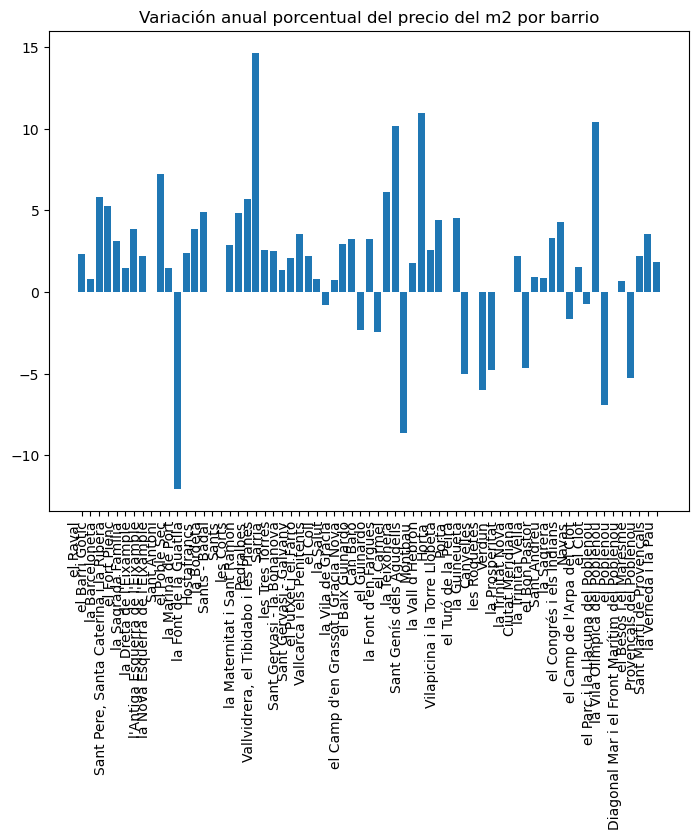



 - Una variable numèrica (Preu)  



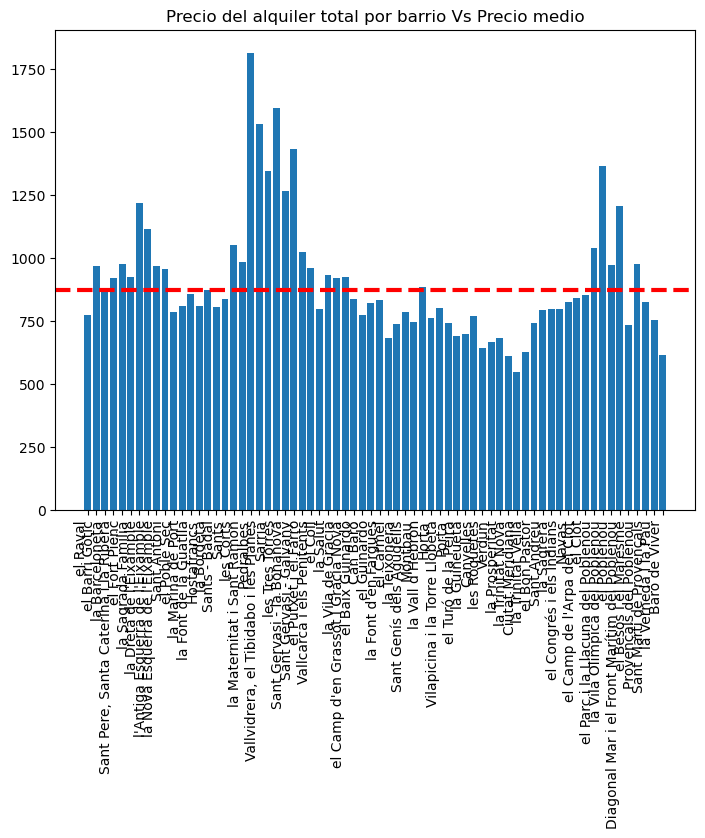



 - Una variable numèrica i una categòrica (Districte i Preu)  



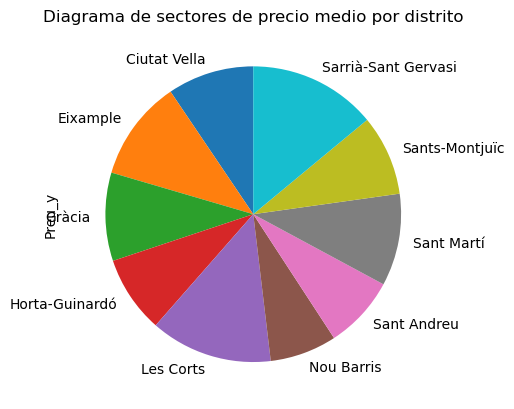



 - Dues variables numèriques (Any o Trimestre i Preu)  



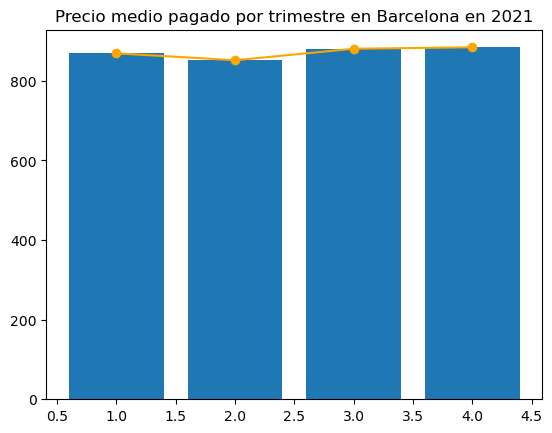



 - Tres variables (Barri o Districte, Trimestre i Preu  



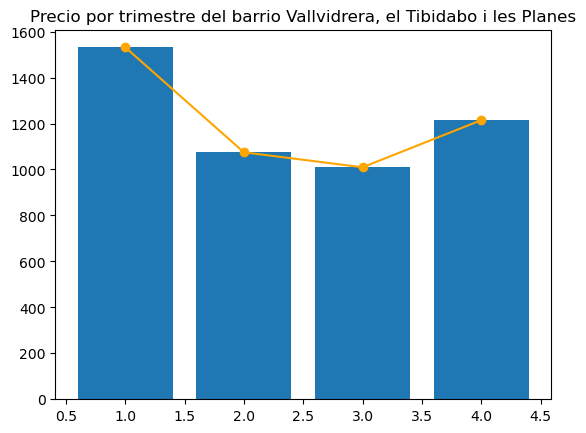

In [132]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


print ('\033[1m','Exercici 1 i 2','\033[0m','\n')
  

df = pd.read_csv('preu lloguer per trimestre i barri.csv')
print('\n')

print('\033[1m','Columnas y Tipos de datos','\033[0m')
#Elimino las filas que contienen '--' en la columna Preu y covierto la columna Preu en float
df.drop(df[df['Preu'] == '--'].index, inplace=True)
df['Preu']=df['Preu'].astype(float)
df.info()
df.info() 
print('\n')

print('\033[1m','Contenido del fichero','\033[0m')
print(df)
print('\n')

#Para mejor analisis voy a separar en diferentes columnas los precios de alquiler: por m2 y alquiler total. 
#Copio el dataframe df a dfm2 y dfm3
#En cada uno eliminaré las filas de la otra variante y después haré merge 

dfm2=df
dfm2 = dfm2.drop(dfm2[dfm2['Lloguer_mitja']=='Lloguer mitjà mensual (Euros/mes)'].index)

dfm3=df
dfm3 = dfm3.drop(dfm3[dfm3['Lloguer_mitja']=='Lloguer mitjà per superfície (Euros/m2 mes)'].index)

df1=dfm2.merge(dfm3, how='left', on=['Any','Trimestre','Codi_Districte','Nom_Districte','Codi_Barri', 'Nom_Barri'])


print ('\033[1m','- Visualització per una variable categòrica (Districte o Barri)','\033[0m','\n')

df20=dfm2.loc[dfm2['Trimestre']==1, ['Trimestre', 'Nom_Barri', 'Preu']]
df21=dfm2.loc[dfm2['Trimestre']==4, ['Trimestre', 'Nom_Barri', 'Preu']]
df22=df20.merge(df21, how='left', on=['Nom_Barri'])
df22['delta%']=(df22['Preu_y']-df22['Preu_x'])/df22['Preu_x']*100
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
barri = df22['Nom_Barri']
Delta_Preu_2021 = df22['delta%']
ax.bar(barri, Delta_Preu_2021)
fig.autofmt_xdate(rotation=90 )
plt.title('Variación anual porcentual del precio del m2 por barrio')
plt.savefig('Fig4.1-1.png', bbox_inches='tight')
plt.show()
print('\n')

print ('\033[1m','- Una variable numèrica (Preu)','\033[0m','\n')
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
barri = df1['Nom_Barri']
Preu_total = df1['Preu_y']
ax.bar(barri, Preu_total)
plt.axhline(y=np.nanmean(df1['Preu_y']), color='red', linestyle='--', linewidth=3, label='Avg')
fig.autofmt_xdate(rotation=90 )
plt.title('Precio del alquiler total por barrio Vs Precio medio')
plt.savefig('Fig4.1-2.png', bbox_inches='tight')
plt.show()
print('\n')

print ('\033[1m','- Una variable numèrica i una categòrica (Districte i Preu)','\033[0m','\n')

df3=df1.groupby(['Nom_Districte'])['Preu_y'].mean() 
df3.plot.pie(startangle=90)
plt.title('Diagrama de sectores de precio medio por distrito')
plt.savefig('Fig4.1-3.png', bbox_inches='tight')
plt.show()
print('\n')


print ('\033[1m','- Dues variables numèriques (Any o Trimestre i Preu)','\033[0m','\n')

df4=df1.groupby(['Trimestre']).agg(ave_preu=('Preu_y', 'mean'))
df4=df4.reset_index(level='Trimestre')
plt.bar(df4['Trimestre'], df4['ave_preu'])
plt.plot(df4['Trimestre'], df4['ave_preu'], '-o', color='orange')
plt.title('Precio medio pagado por trimestre en Barcelona en 2021')
plt.savefig('Fig4.1-5.png', bbox_inches='tight')
plt.show()
print('\n')


print ('\033[1m','- Tres variables (Barri o Districte, Trimestre i Preu','\033[0m','\n')
df5=df1.loc[df1['Nom_Barri']=='Vallvidrera, el Tibidabo i les Planes', ['Trimestre','Preu_y']]
plt.bar(df5['Trimestre'], df5['Preu_y'])
plt.plot(df5['Trimestre'], df5['Preu_y'], '-o', color='orange')
plt.title('Precio por trimestre del barrio Vallvidrera, el Tibidabo i les Planes')
plt.savefig('Fig4.1-6.png', bbox_inches='tight')
plt.show()
print('\n')











 Exercici 3  

 -Proposa alguna visualització que creguis que pot resultar interessant. 


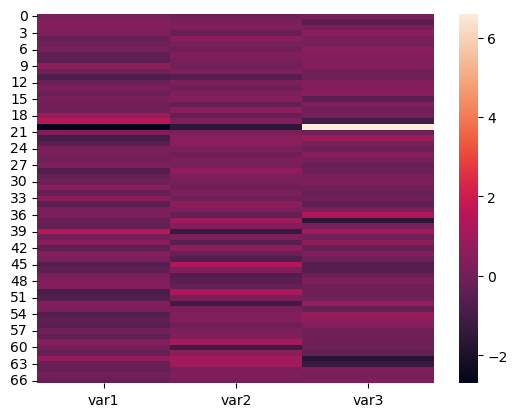

In [172]:
import seaborn as sns

print ('\033[1m','Exercici 3','\033[0m','\n')
print('\033[1m','-Proposa alguna visualització que creguis que pot resultar interessant.','\033[0m')
#mapa de calor varianza del precio por trimestre
dft1=df1.loc[df1['Trimestre']==1, ['Nom_Barri', 'Preu_x']]
dft2=df1.loc[df1['Trimestre']==2, ['Nom_Barri', 'Preu_x']]
dft3=df1.loc[df1['Trimestre']==3, ['Nom_Barri', 'Preu_x']]
dft4=df1.loc[df1['Trimestre']==4, ['Nom_Barri', 'Preu_x']]
df10=dft1.merge(dft2, how='left', on=['Nom_Barri'])
df10=df10.rename({'Preu_x_x': 'preu_1', 'Preu_x_y': 'preu_2'}, axis=1)
df10=df10.merge(dft3, how='left', on=['Nom_Barri'])
df10=df10.merge(dft4, how='left', on=['Nom_Barri'])
df10=df10.rename({'Preu_x_x': 'preu_3', 'Preu_x_y': 'preu_4'}, axis=1)
df10['var1']=(df10['preu_2']-df10['preu_1'])
df10['var2']=(df10['preu_3']-df10['preu_2'])
df10['var3']=(df10['preu_4']-df10['preu_3'])


sns.heatmap(df10[['var1','var2','var3']])
plt.title('Mapa de calor de la variación porcentual de los precios por barrio')
plt.show()